<a href="https://colab.research.google.com/github/johnnykava/trabalhoA2-DataScience/blob/main/CodigoGraficoAvaliativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()


Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['amazon_cells_labelled.txt']),sep = '\t')
print(df)

                                                  text  target
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
..                                                 ...     ...
995  The screen does get smudged easily because it ...       0
996  What a piece of junk.. I lose more calls on th...       0
997                       Item Does Not Match Picture.       0
998  The only thing that disappoint me is the infra...       0
999  You can not answer calls with the unit, never ...       0

[1000 rows x 2 columns]


In [3]:
#Mostra a quantidade de linhas e colunas
df.shape

(1000, 2)

In [4]:
#Usar somente se o target não estiver transformado em 0 ou 1
df['target'] = df['target'].apply(lambda x: 0 if x == 'ham' else 1)

In [4]:
df.groupby('target')['target'].count()

,target
target,
0,500
1,500


In [5]:
#Faz a contagem dos dados
contagem_classes = df.groupby('target')['target'].count()
total = contagem_classes.sum()

#Depois multiplica por 100 para dar em %
porcentagem_classes = contagem_classes / total * 100
print(porcentagem_classes)


target
0    50.0
1    50.0
Name: target, dtype: float64


In [6]:
#Separamos os dados para treino e test
import numpy as np
from sklearn.model_selection import train_test_split
X = df['text']
y= df['target']
#Embaralhamos os dados sendo 25% para teste e 75% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
#!pip install scikit-learn==1.2.2
from sklearn.feature_extraction.text import TfidfVectorizer

#Baixa uma lista de palavras que não tem peso para frases
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


#Pega as palavras sem peso da lingua "Ingles"
stop_words = stopwords.words('english')

#Armazena o indice das frases que foram para teste e treino mesmo apos embaralhar
X_train_indices = X_train.index
X_test_indices = X_test.index

#Usamos os indices que foram armazenos para pegar exatamente as frases separadas de treino e teste
X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]


vectorizer = TfidfVectorizer(stop_words=stop_words)
# Faz a contagem de palavras das frases
X_train_tfidf = vectorizer.fit_transform(X_train_text)
# Faz um teste com as contagem de palavras obtidas no treino e não considera palavras novas
X_test_tfidf = vectorizer.transform(X_test_text)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier()
#Faz o modelo aprender usando os dados convertidos
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [10]:
#Faz uma previsão com os dados obtidos no teste informando (0 ou 1)
y_pred = model.predict(X_test_tfidf)

In [11]:
#Nos mostra a confiança do modelo, a % que ele acha que um item é positivo
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)

lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
y_pred_proba_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]

In [13]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score,
                             roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_auc_roc = roc_auc_score(y_test, y_pred_proba)
rf_auc_pr = average_precision_score(y_test, y_pred_proba)

print("Dados da RandomForest sem hiperparametros")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"Precisão: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc_roc:.4f}")
print(f"AUC-PR (AP): {rf_auc_pr:.4f}")


Dados da RandomForest sem hiperparametros
Acurácia: 0.7720
Precisão: 0.8051
Recall: 0.7364
F1-Score: 0.7692
AUC-ROC: 0.8551
AUC-PR (AP): 0.8606


In [14]:
print("Dados da Regressão Logistica sem hiperparametros")
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc_roc = roc_auc_score(y_test, y_pred_proba_lr)
lr_auc_pr = average_precision_score(y_test, y_pred_proba_lr)

print(f"Acurácia: {lr_accuracy:.4f}")
print(f"Precisão: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc_roc:.4f}")
print(f"AUC-PR (AP): {lr_auc_pr:.4f}")

Dados da Regressão Logistica sem hiperparametros
Acurácia: 0.8040
Precisão: 0.8279
Recall: 0.7829
F1-Score: 0.8048
AUC-ROC: 0.8948
AUC-PR (AP): 0.8800


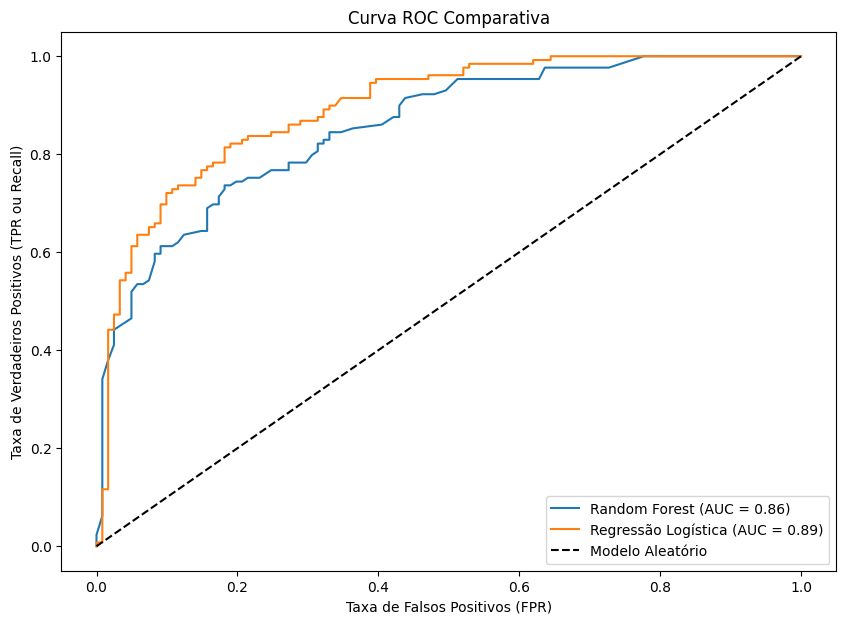

In [15]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc_roc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {lr_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatório') # Linha de referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR ou Recall)')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.show()

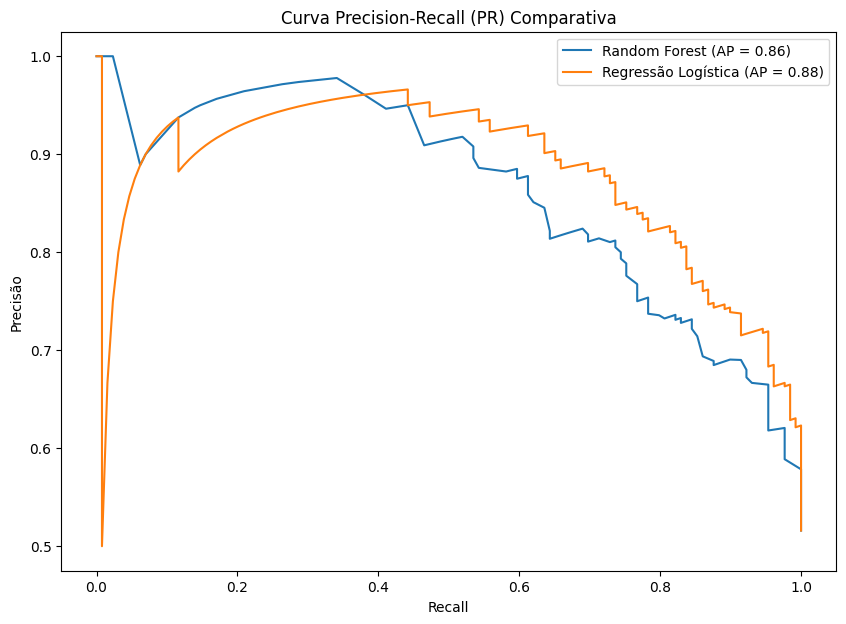

In [16]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(10, 7))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {rf_auc_pr:.2f})')
plt.plot(recall_lr, precision_lr, label=f'Regressão Logística (AP = {lr_auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall (PR) Comparativa')
plt.legend()
plt.show()

In [17]:
#Pega as probabilidades de ser positivo e de ser negativo
probs = model.predict_proba(X_test_tfidf)
#Muda para pegar somente a probabilidade de ser positivo
positive_probs = probs[:,1]

#Mostra a lista das probabilidades de ser positivo
print(positive_probs)

[0.72       0.66       0.8        0.04       0.61       0.89
 0.3        0.87       0.07       0.91       1.         0.02
 0.06       0.5        0.54       0.24       0.87       0.02
 0.26       0.89       0.595      0.83       0.88       0.17
 0.27       0.1        0.09       0.32       0.37       0.9
 0.26       0.18       0.02       0.85       0.2        0.13
 0.67       0.59       0.53       0.02       0.14       0.71
 0.17       0.64       0.46       0.86       0.93       0.03
 0.3        0.27       0.44       0.29       0.26       0.24
 0.1        0.65       0.23       0.88       0.36       0.06
 0.93       0.75       0.27       0.05       0.01       0.89
 0.86       0.89       0.07       0.09       0.9        0.31
 0.05       0.78       0.85       0.91       0.12       0.19
 0.34       0.45       0.67       0.04       1.         0.58
 0.15       0.15       0.06       0.29       0.83       0.58
 0.14       0.95       0.1        0.37       0.7        0.02
 0.12       0.91       0.

In [18]:
#Organiza todas as probabilidades de ser positivo junto do target
df_pos = pd.DataFrame({"prob_spam": positive_probs,"target":y_test})

In [19]:
df_pos

,prob_spam,target
521,0.72,1
737,0.66,1
740,0.80,1
660,0.04,0
411,0.61,1
...,...,...
109,0.14,0
430,0.23,1
77,0.92,1
84,0.85,0


In [20]:
#Mostra as linhas e colunas
df_pos.shape

(250, 2)

In [21]:
#Separa apenas para os que são positivos
df_apenas_positivo = df_pos.loc[df_pos['target']==1]

In [22]:
#Mostra as linhas e colunas
df_apenas_positivo.shape

(129, 2)

In [23]:
df_apenas_positivo

,prob_spam,target
521,0.72,1
737,0.66,1
740,0.80,1
411,0.61,1
678,0.89,1
...,...,...
333,0.48,1
514,0.92,1
306,0.99,1
430,0.23,1


In [24]:
df_pos

,prob_spam,target
521,0.72,1
737,0.66,1
740,0.80,1
660,0.04,0
411,0.61,1
...,...,...
109,0.14,0
430,0.23,1
77,0.92,1
84,0.85,0


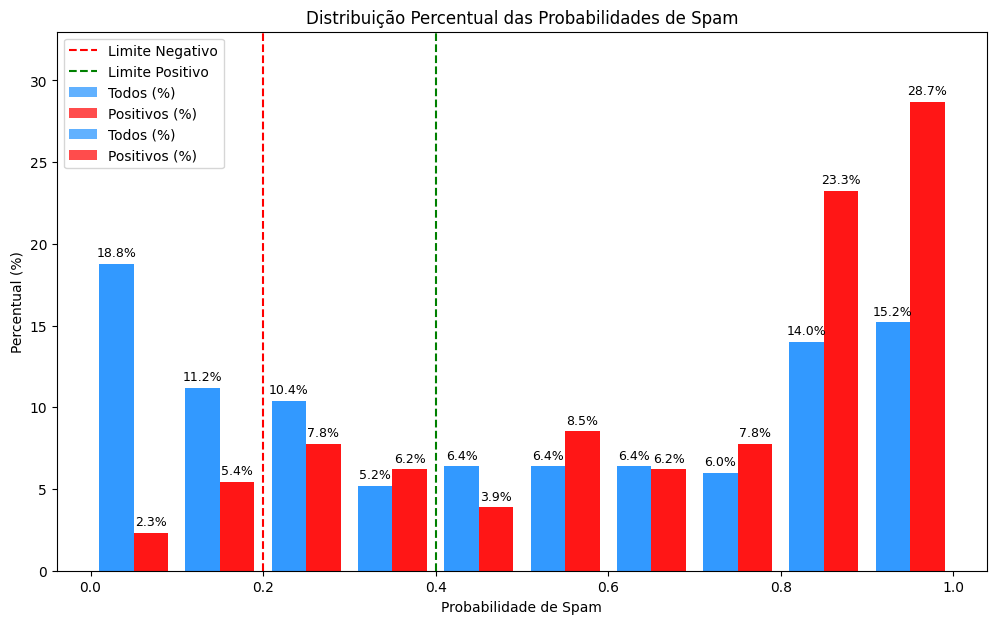

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Cria as caixas (bins) de 10% em 10% porcento
step = 0.1
bins = np.arange(0, 1 + step, step)

#Faz a contagem de todas as probabilidades
hist_all, _ = np.histogram(df_pos["prob_spam"], bins=bins)
#Faz a contagem somente das probabilidades que realmente eram positivas
hist_pos, _ = np.histogram(df_apenas_positivo["prob_spam"], bins=bins)

# Convertendo para percentual (%)
hist_all_pct = (hist_all / hist_all.sum()) * 100
hist_pos_pct = (hist_pos / hist_pos.sum()) * 100

# Posicionamento das barras
width = step * 0.4
x = bins[:-1] + step/2

# Crie a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 7))

# Desenhe as barras
bars1 = ax.bar(x - width/2, hist_all_pct, width=width, label='Todos (%)', color='#1E90FF', alpha=0.7)
bars2 = ax.bar(x + width/2, hist_pos_pct, width=width, label='Positivos (%)', color='red', alpha=0.7)

# Adicione os rótulos
ax.bar_label(bars1, fmt='%.1f%%', padding=3, fontsize=9)
ax.bar_label(bars2, fmt='%.1f%%', padding=3, fontsize=9)

# Agora, pegamos o valor máximo entre as duas listas de alturas (barras azuis e vermelhas)
# e damos um espaço extra de 15% (multiplicando por 1.15)
altura_maxima = max(hist_all_pct.max(), hist_pos_pct.max())
ax.set_ylim(0, altura_maxima * 1.15)

plt.bar(x - width/2, hist_all_pct, width=width, label='Todos (%)', color='#1E90FF', alpha=0.7)
plt.bar(x + width/2, hist_pos_pct, width=width, label='Positivos (%)', color='red', alpha=0.7)

plt.xlabel('Probabilidade de Spam')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual das Probabilidades de Spam')

# Pontos de corte customizáveis
threshold_neg = 0.2
threshold_pos = 0.4
plt.axvline(threshold_neg, color='red', linestyle='--', label='Limite Negativo')
plt.axvline(threshold_pos, color='green', linestyle='--', label='Limite Positivo')

plt.legend()
plt.show()

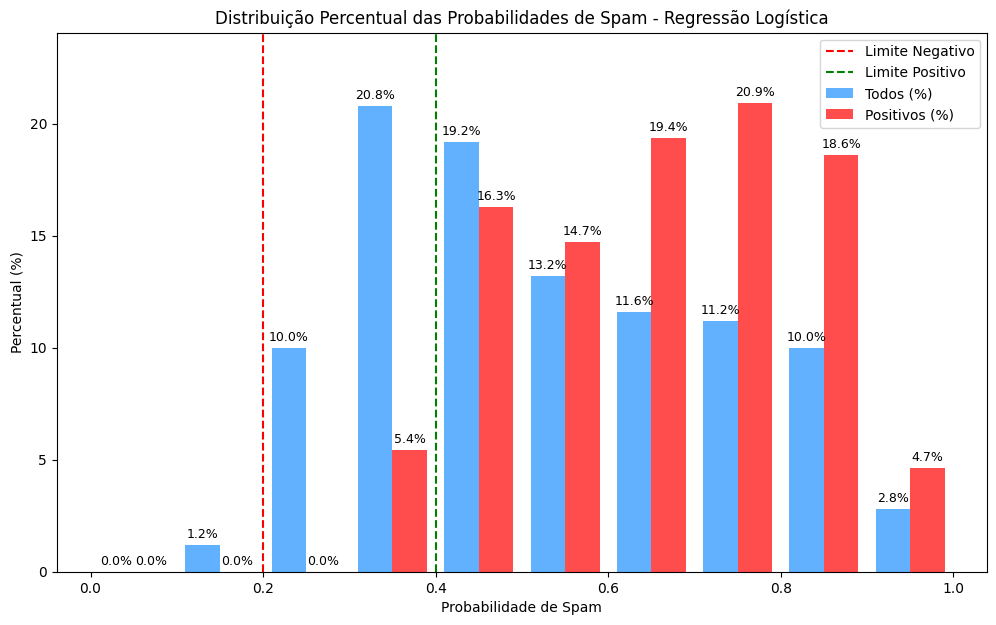

In [40]:
# --- Bloco 2: Gráfico para a Regressão Logística ---

# 1. Alteração Principal: Criar novos DataFrames com as previsões da Regressão Logística
#    Usamos a variável com as probabilidades da Regressão Logística: y_pred_proba_lr
df_pos_lr = pd.DataFrame({"prob_spam": y_pred_proba_lr, "target": y_test})
df_apenas_positivo_lr = df_pos_lr.loc[df_pos_lr['target']==1]


# Lógica de cálculo e plotagem (agora usando os novos DataFrames)
step = 0.1
bins = np.arange(0, 1 + step, step)
# Usando df_pos_lr e df_apenas_positivo_lr
hist_all, _ = np.histogram(df_pos_lr["prob_spam"], bins=bins)
hist_pos, _ = np.histogram(df_apenas_positivo_lr["prob_spam"], bins=bins)
hist_all_pct = (hist_all / hist_all.sum()) * 100
hist_pos_pct = (hist_pos / hist_pos.sum()) * 100
width = step * 0.4
x = bins[:-1] + step/2

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width/2, hist_all_pct, width=width, label='Todos (%)', color='#1E90FF', alpha=0.7)
bars2 = ax.bar(x + width/2, hist_pos_pct, width=width, label='Positivos (%)', color='red', alpha=0.7)

ax.bar_label(bars1, fmt='%.1f%%', padding=3, fontsize=9)
ax.bar_label(bars2, fmt='%.1f%%', padding=3, fontsize=9)

altura_maxima = max(hist_all_pct.max(), hist_pos_pct.max())
ax.set_ylim(0, altura_maxima * 1.15)

ax.set_xlabel('Probabilidade de Spam')
ax.set_ylabel('Percentual (%)')
ax.set_title('Distribuição Percentual das Probabilidades de Spam - Regressão Logística') # <-- Título Alterado

threshold_neg = 0.2
threshold_pos = 0.4
ax.axvline(threshold_neg, color='red', linestyle='--', label='Limite Negativo')
ax.axvline(threshold_pos, color='green', linestyle='--', label='Limite Positivo')

ax.legend()
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corte 0.2 -> considera como positivo apenas prob > 0.2 (zona negativa como 0)
y_pred_02 = (df_pos["prob_spam"] > 0.2).astype(int)

# Corte 0.4 -> considera como positivo prob >= 0.4 (zona positiva como 1)
y_pred_04 = (df_pos["prob_spam"] >= 0.4).astype(int)

# métricas para corte 0.2
print("Corte 0.2")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_02))
print("Precision:", precision_score(df_pos["target"], y_pred_02))
print("Recall:", recall_score(df_pos["target"], y_pred_02))
print("F1:", f1_score(df_pos["target"], y_pred_02))

# métricas para corte 0.4
print("\nCorte 0.4")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_04))
print("Precision:", precision_score(df_pos["target"], y_pred_04))
print("Recall:", recall_score(df_pos["target"], y_pred_04))
print("F1:", f1_score(df_pos["target"], y_pred_04))


Corte 0.2
Accuracy: 0.744
Precision: 0.6900584795321637
Recall: 0.9147286821705426
F1: 0.7866666666666666

Corte 0.4
Accuracy: 0.748
Precision: 0.7426470588235294
Recall: 0.7829457364341085
F1: 0.7622641509433963


In [41]:
# --- Métricas com Pontos de Corte para Regressão Logística ---

# Lembre-se que já criamos o DataFrame df_pos_lr com as probabilidades da Regressão Logística
# Se não, podemos recriá-lo:
# df_pos_lr = pd.DataFrame({"prob_spam": y_pred_proba_lr, "target": y_test})

# Aplicando os mesmos pontos de corte nas probabilidades da REGRESSÃO LOGÍSTICA
y_pred_02_lr = (df_pos_lr["prob_spam"] > 0.2).astype(int)
y_pred_04_lr = (df_pos_lr["prob_spam"] >= 0.4).astype(int)

print("--- Análise de Corte para Regressão Logística ---")

# Métricas para o corte 0.2
print("\nMétricas para corte 0.2")
print(f"Acurácia: {accuracy_score(df_pos_lr['target'], y_pred_02_lr):.4f}")
print(f"Precisão: {precision_score(df_pos_lr['target'], y_pred_02_lr):.4f}")
print(f"Recall:   {recall_score(df_pos_lr['target'], y_pred_02_lr):.4f}")
print(f"F1-Score: {f1_score(df_pos_lr['target'], y_pred_02_lr):.4f}")

# Métricas para o corte 0.4
print("\nMétricas para corte 0.4")
print(f"Acurácia: {accuracy_score(df_pos_lr['target'], y_pred_04_lr):.4f}")
print(f"Precisão: {precision_score(df_pos_lr['target'], y_pred_04_lr):.4f}")
print(f"Recall:   {recall_score(df_pos_lr['target'], y_pred_04_lr):.4f}")
print(f"F1-Score: {f1_score(df_pos_lr['target'], y_pred_04_lr):.4f}")

--- Análise de Corte para Regressão Logística ---

Métricas para corte 0.2
Acurácia: 0.5280
Precisão: 0.5223
Recall:   1.0000
F1-Score: 0.6862

Métricas para corte 0.4
Acurácia: 0.7800
Precisão: 0.7176
Recall:   0.9457
F1-Score: 0.8161


In [27]:
def assign_zone(prob):
    if prob <= 0.2:
        return "negativa"
    elif prob >= 0.4:
        return "positiva"
    else:
        return "manual"

#Usa a função para cada uma das probabilidades
df_pos["zone"] = df_pos["prob_spam"].apply(assign_zone)

# Ver quantos exemplos vão para cada zona
print(df_pos["zone"].value_counts())


zone
positiva    136
negativa     79
manual       35
Name: count, dtype: int64


array([[<Axes: title={'center': 'prob_spam'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

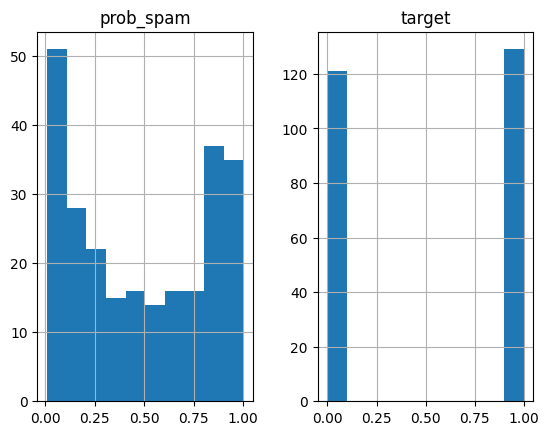

In [28]:
df_pos.hist()

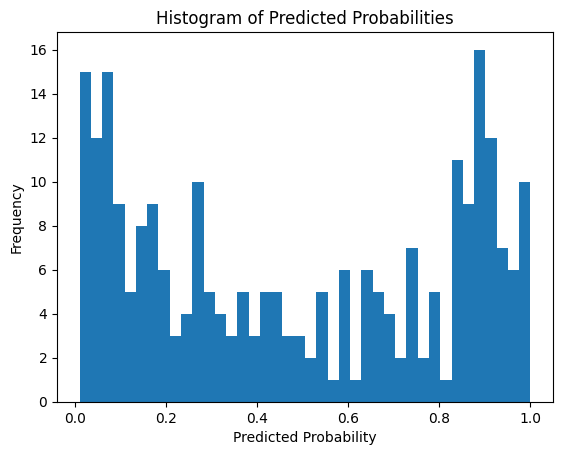

In [29]:
plt.hist(positive_probs, bins=40)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()

In [30]:
nomes_features = vectorizer.get_feature_names_out()

          Palavra  Importancia
593         great     0.074602
587          good     0.027171
1439        works     0.024483
943         phone     0.022316
1408         well     0.021731
459     excellent     0.018438
858          nice     0.016405
768          love     0.014744
131          best     0.014428
254   comfortable     0.011923


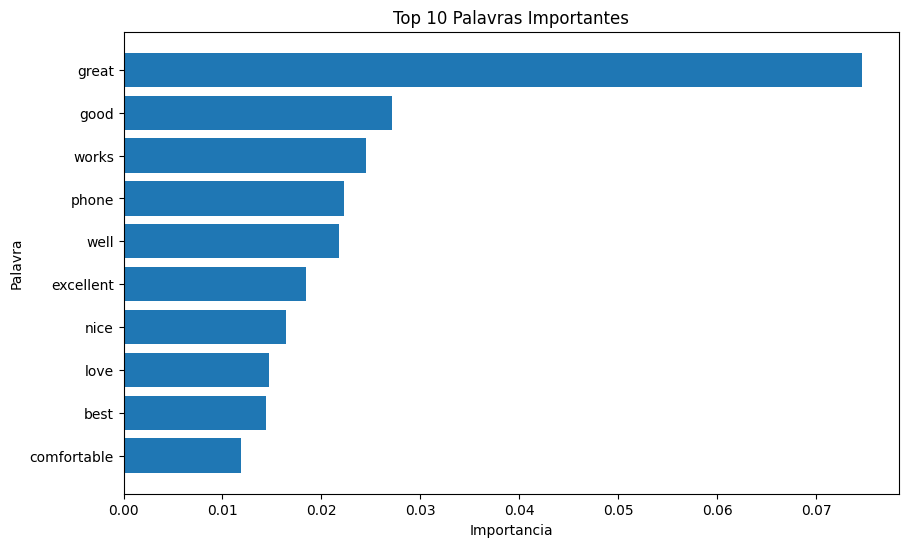

In [31]:
#Pega a importancia de cada palavra consideradas importantes que o modelo selecionou
importances = model.feature_importances_

#Pega a lista de palavras na mesma ordem das importancias
feature_names = vectorizer.get_feature_names_out()
#Cria um dataframe com as palavras consideradas importantes e suas notas
feature_importance_df = pd.DataFrame({'Palavra': feature_names, 'Importancia': importances})

#Ordena a tabela pela coluna Importancia
feature_importance_df = feature_importance_df.sort_values('Importancia', ascending=False)

#Quantidade de palavras que queremos
N = 10
print(feature_importance_df.head(N))

#Desenha o mapa
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Palavra'][:N], feature_importance_df['Importancia'][:N])
plt.xlabel('Importancia')
plt.ylabel('Palavra')
plt.title('Top {} Palavras Importantes'.format(N))
plt.gca().invert_yaxis()
plt.show()

In [42]:
# --- Parte 3: Otimização de Hiperparâmetros (GridSearchCV) ---

from sklearn.model_selection import GridSearchCV

# --- 1. Otimização do RandomForestClassifier ---

print("--- Iniciando otimização para RandomForest ---")
print("Isso pode levar alguns minutos...")

# Defina a grade de hiperparâmetros que você quer testar
# Nota: Esta é uma grade pequena para executar mais rápido.
param_grid_rf = {
    'n_estimators': [100, 200],      # Número de árvores
    'max_depth': [None, 20],       # Profundidade máxima (None = sem limite)
    'min_samples_split': [2, 5]      # Mínimo de amostras para dividir um nó
}

# Crie o objeto GridSearchCV
# cv=5 -> Validação Cruzada de 5 folds.
# n_jobs=-1 -> Usa todos os processadores para acelerar.
# scoring='roc_auc' -> Métrica para decidir qual o melhor modelo.
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              n_jobs=-1,
                              scoring='roc_auc',
                              verbose=1) # verbose=1 mostra um progresso simplificado

# Execute a busca nos dados de treino.
rf_grid_search.fit(X_train_tfidf, y_train)

# Guarde o melhor modelo encontrado em uma NOVA variável
rf_model_tuned = rf_grid_search.best_estimator_
print("\nMelhores parâmetros para RandomForest:", rf_grid_search.best_params_)
print(f"Melhor score AUC-ROC na validação cruzada: {rf_grid_search.best_score_:.4f}")


# --- 2. Otimização da LogisticRegression ---

print("\n--- Iniciando otimização para Regressão Logística ---")

# Defina a grade de hiperparâmetros
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],          # Parâmetro de regularização
    'solver': ['liblinear', 'saga'] # Algoritmos de otimização
}

# Crie o objeto GridSearchCV
lr_grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=2000, random_state=42),
                             param_grid=param_grid_lr,
                             cv=5,
                             n_jobs=-1,
                             scoring='roc_auc',
                             verbose=1)

# Execute a busca
lr_grid_search.fit(X_train_tfidf, y_train)

# Guarde o melhor modelo encontrado em uma NOVA variável
lr_model_tuned = lr_grid_search.best_estimator_
print("\nMelhores parâmetros para Regressão Logística:", lr_grid_search.best_params_)
print(f"Melhor score AUC-ROC na validação cruzada: {lr_grid_search.best_score_:.4f}")


# --- 3. Fazendo previsões com os NOVOS modelos otimizados ---
print("\nFazendo previsões com os modelos otimizados...")

# Previsões do RandomForest Otimizado
y_pred_rf_tuned = rf_model_tuned.predict(X_test_tfidf)
y_pred_proba_rf_tuned = rf_model_tuned.predict_proba(X_test_tfidf)[:, 1]

# Previsões da Regressão Logística Otimizada
y_pred_lr_tuned = lr_model_tuned.predict(X_test_tfidf)
y_pred_proba_lr_tuned = lr_model_tuned.predict_proba(X_test_tfidf)[:, 1]

print("\nConcluído! Modelos otimizados e suas previsões foram criados com sucesso.")

--- Iniciando otimização para RandomForest ---
Isso pode levar alguns minutos...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Melhores parâmetros para RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Melhor score AUC-ROC na validação cruzada: 0.8563

--- Iniciando otimização para Regressão Logística ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Melhores parâmetros para Regressão Logística: {'C': 10.0, 'solver': 'saga'}
Melhor score AUC-ROC na validação cruzada: 0.8799

Fazendo previsões com os modelos otimizados...

Concluído! Modelos otimizados e suas previsões foram criados com sucesso.


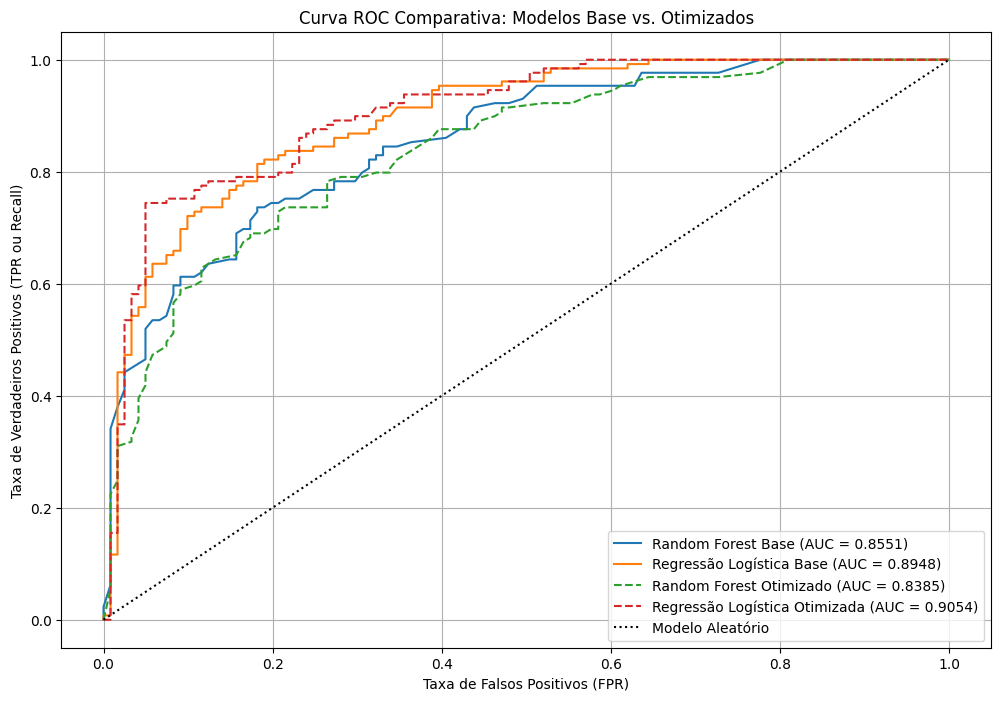

In [45]:
# --- Parte 4: Comparação Visual Final (Base vs. Otimizado) ---

# Reimportando para garantir, caso esteja em uma nova sessão
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# --- 1. Preparando os dados para as Curvas ROC ---

# Modelos Base
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
auc_rf = roc_auc_score(y_test, y_pred_proba)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Modelos Otimizados
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, y_pred_proba_rf_tuned)
auc_rf_tuned = roc_auc_score(y_test, y_pred_proba_rf_tuned)

fpr_lr_tuned, tpr_lr_tuned, _ = roc_curve(y_test, y_pred_proba_lr_tuned)
auc_lr_tuned = roc_auc_score(y_test, y_pred_proba_lr_tuned)

# --- Plotando a Curva ROC Comparativa Final ---
plt.figure(figsize=(12, 8))

# Linhas dos modelos base (sólidas)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Base (AUC = {auc_rf:.4f})', linestyle='-')
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística Base (AUC = {auc_lr:.4f})', linestyle='-')

# Linhas dos modelos otimizados (tracejadas)
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label=f'Random Forest Otimizado (AUC = {auc_rf_tuned:.4f})', linestyle='--')
plt.plot(fpr_lr_tuned, tpr_lr_tuned, label=f'Regressão Logística Otimizada (AUC = {auc_lr_tuned:.4f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k:', label='Modelo Aleatório') # Linha de referência pontilhada
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR ou Recall)')
plt.title('Curva ROC Comparativa: Modelos Base vs. Otimizados')
plt.legend()
plt.grid(True)
plt.show()

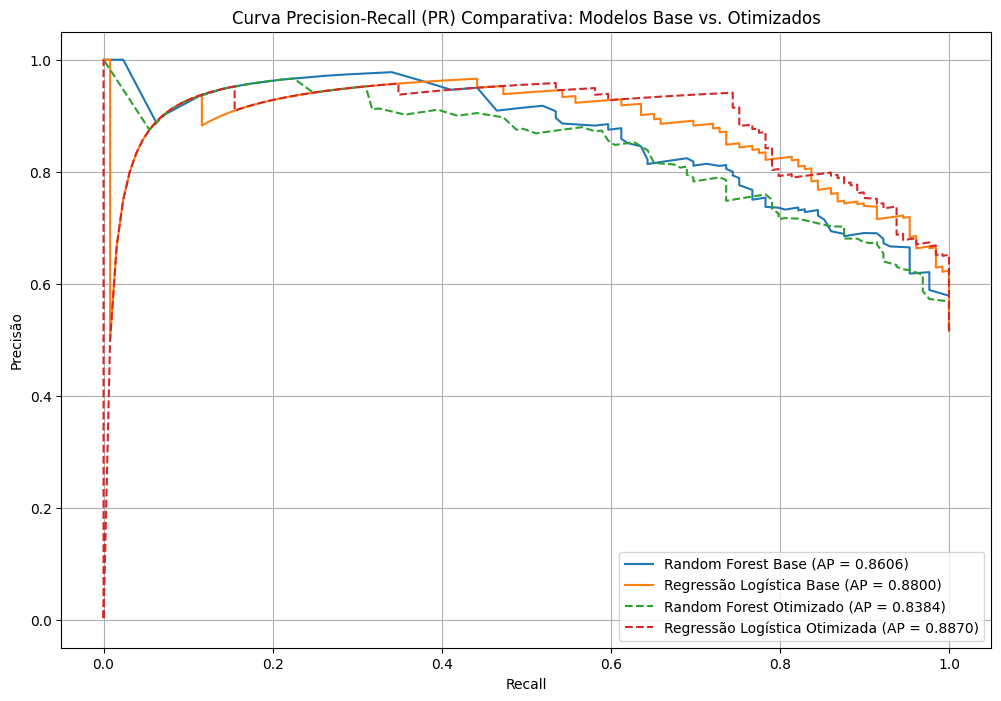

In [46]:
# --- 2. Preparando os dados para as Curvas PR ---

# Modelos Base
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_pred_proba)
ap_rf = average_precision_score(y_test, y_pred_proba)

prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
ap_lr = average_precision_score(y_test, y_pred_proba_lr)

# Modelos Otimizados
prec_rf_tuned, rec_rf_tuned, _ = precision_recall_curve(y_test, y_pred_proba_rf_tuned)
ap_rf_tuned = average_precision_score(y_test, y_pred_proba_rf_tuned)

prec_lr_tuned, rec_lr_tuned, _ = precision_recall_curve(y_test, y_pred_proba_lr_tuned)
ap_lr_tuned = average_precision_score(y_test, y_pred_proba_lr_tuned)


# --- Plotando a Curva PR Comparativa Final ---
plt.figure(figsize=(12, 8))

# Linhas dos modelos base (sólidas)
plt.plot(rec_rf, prec_rf, label=f'Random Forest Base (AP = {ap_rf:.4f})', linestyle='-')
plt.plot(rec_lr, prec_lr, label=f'Regressão Logística Base (AP = {ap_lr:.4f})', linestyle='-')

# Linhas dos modelos otimizados (tracejadas)
plt.plot(rec_rf_tuned, prec_rf_tuned, label=f'Random Forest Otimizado (AP = {ap_rf_tuned:.4f})', linestyle='--')
plt.plot(rec_lr_tuned, prec_lr_tuned, label=f'Regressão Logística Otimizada (AP = {ap_lr_tuned:.4f})', linestyle='--')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall (PR) Comparativa: Modelos Base vs. Otimizados')
plt.legend()
plt.grid(True)
plt.show()

--- Encontrando Pontos de Corte Ótimos para: Regressão Logística Otimizada ---

Melhor ponto de corte via F1-Score:
  - Limiar (Threshold): 0.6735
  - F1-Score: 0.8312
  - Precisão: 0.9412
  - Recall: 0.7442

Melhor ponto de corte via Youden's J:
  - Limiar (Threshold): 0.6735
  - Youden's J: 0.6946
  - TPR (Recall): 0.7442
  - FPR: 0.0496


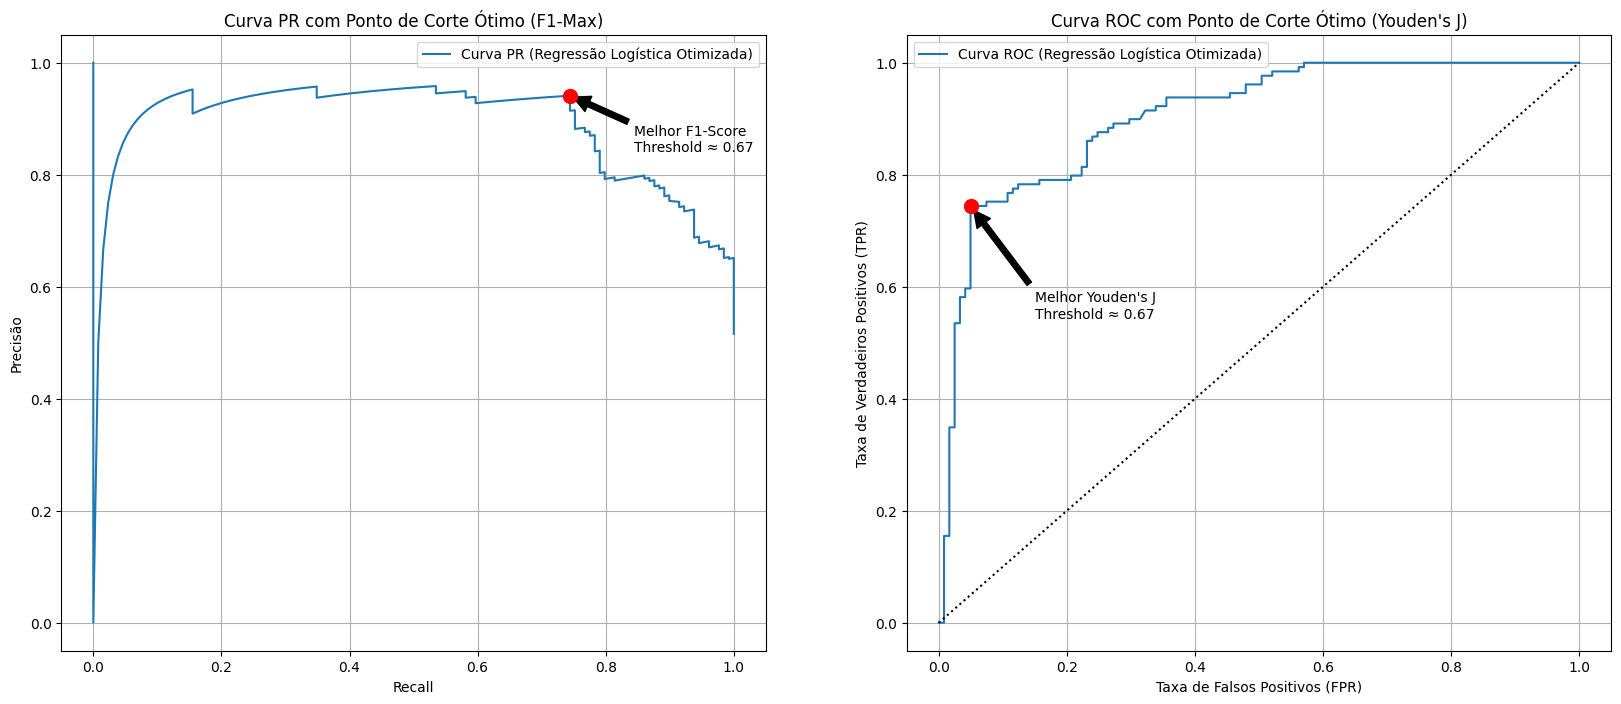

In [44]:
# --- Análise de Ponto de Corte Ótimo para o Melhor Modelo ---

# Escolha as previsões do seu melhor modelo.
# Vamos usar a Regressão Logística Otimizada como exemplo.
y_true = y_test
y_proba = y_pred_proba_lr_tuned
model_name = "Regressão Logística Otimizada"

print(f"--- Encontrando Pontos de Corte Ótimos para: {model_name} ---")


# --- 1. Ponto Ótimo pela Curva PR (Maximizando F1-Score) ---
precision, recall, thresholds_pr = precision_recall_curve(y_true, y_proba)

# Calcula o F1-Score para cada limiar. Adicionamos um pequeno valor (epsilon) para evitar divisão por zero.
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)

# Encontra o índice (localização) do maior F1-Score
best_f1_idx = np.argmax(f1_scores)

# Pega os valores correspondentes a esse ponto
best_f1_score = f1_scores[best_f1_idx]
best_threshold_f1 = thresholds_pr[best_f1_idx]
best_precision_f1 = precision[best_f1_idx]
best_recall_f1 = recall[best_f1_idx]

print(f"\nMelhor ponto de corte via F1-Score:")
print(f"  - Limiar (Threshold): {best_threshold_f1:.4f}")
print(f"  - F1-Score: {best_f1_score:.4f}")
print(f"  - Precisão: {best_precision_f1:.4f}")
print(f"  - Recall: {best_recall_f1:.4f}")


# --- 2. Ponto Ótimo pela Curva ROC (Maximizando Youden's J) ---
fpr, tpr, thresholds_roc = roc_curve(y_true, y_proba)

# Calcula o Youden's J para cada limiar
j_scores = tpr - fpr

# Encontra o índice do maior J-Score
best_j_idx = np.argmax(j_scores)

# Pega os valores correspondentes
best_j_score = j_scores[best_j_idx]
best_threshold_j = thresholds_roc[best_j_idx]
best_tpr_j = tpr[best_j_idx]
best_fpr_j = fpr[best_j_idx]

print(f"\nMelhor ponto de corte via Youden's J:")
print(f"  - Limiar (Threshold): {best_threshold_j:.4f}")
print(f"  - Youden's J: {best_j_score:.4f}")
print(f"  - TPR (Recall): {best_tpr_j:.4f}")
print(f"  - FPR: {best_fpr_j:.4f}")


# --- 3. Plotando os gráficos com os pontos ótimos ---

# Gráfico da Curva PR com o ponto de F1-Máximo
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(recall, precision, label=f'Curva PR ({model_name})')
ax[0].scatter(best_recall_f1, best_precision_f1, marker='o', color='red', s=100, zorder=5)
ax[0].annotate(f'Melhor F1-Score\nThreshold ≈ {best_threshold_f1:.2f}',
             xy=(best_recall_f1, best_precision_f1),
             xytext=(best_recall_f1 + 0.1, best_precision_f1 - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].set_title('Curva PR com Ponto de Corte Ótimo (F1-Max)')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precisão')
ax[0].grid(True)
ax[0].legend()


# Gráfico da Curva ROC com o ponto de Youden's J Máximo
ax[1].plot(fpr, tpr, label=f'Curva ROC ({model_name})')
ax[1].plot([0, 1], [0, 1], 'k:')
ax[1].scatter(best_fpr_j, best_tpr_j, marker='o', color='red', s=100, zorder=5)
ax[1].annotate(f"Melhor Youden's J\nThreshold ≈ {best_threshold_j:.2f}",
             xy=(best_fpr_j, best_tpr_j),
             xytext=(best_fpr_j + 0.1, best_tpr_j - 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].set_title("Curva ROC com Ponto de Corte Ótimo (Youden's J)")
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].grid(True)
ax[1].legend()

plt.show()